In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import random
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [448]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")
train_test_data = [train,test]

In [449]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [450]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [451]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [452]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [453]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [454]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [455]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### DATA EXPLORATION
Here we will see the relationship of various features with the Survival, as that is what we have to predict ultimately. Data is analysed and observations are made.


In [456]:
survived = train[train['Survived']== 1]
not_survived = train[train['Survived'] == 0]

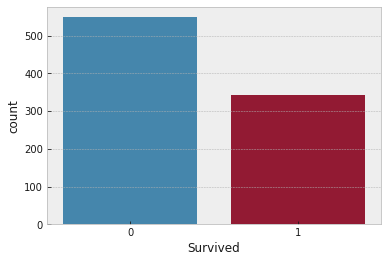

In [457]:
sns.countplot(x='Survived', data = train)

In [458]:
print("Survived : %i (%.1f%%)" %(len(survived), float(len(survived)/len(train))*100))

Survived : 342 (38.4%)


In [459]:
print("Not Survived : %i (%.lf%%)" %(len(not_survived), float(len(survived)/len(train))*100))

Not Survived : 549 (38%)


In [460]:
print("Total Passengers: %i" %len(train))

Total Passengers: 891


### Pclass vs Survival 

In [461]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [462]:
train.groupby(['Pclass']).Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

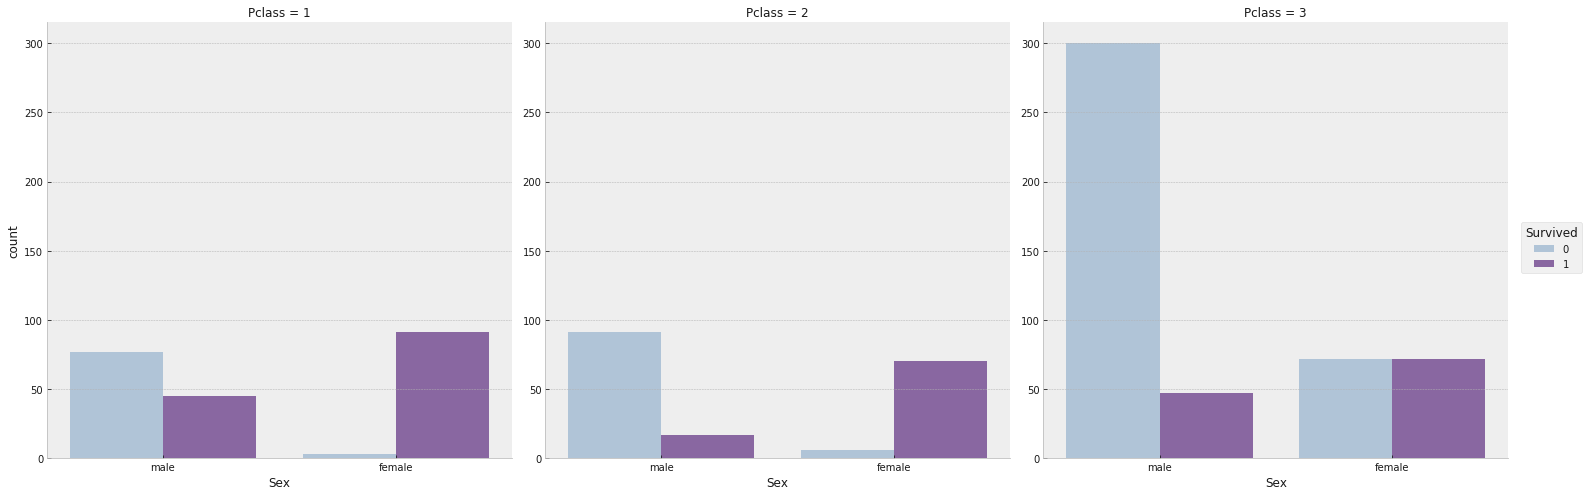

In [463]:
sns.factorplot(x = "Sex", hue = "Survived", col = "Pclass", data = train, kind = "count", size = 7, aspect = 1
              ,palette = "BuPu")

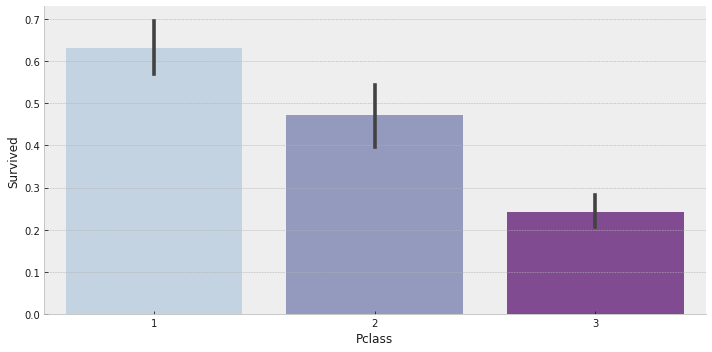

In [464]:
sns.factorplot(x = "Pclass", y= "Survived", data=train, size =5, kind = "bar", palette = "BuPu", aspect = 2)

### Sex vs Survival

In [465]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [466]:
train.groupby(['Sex','Pclass'])[["Survived"]].count()

Survived
Sex    Pclass          
female 1             94
       2             76
       3            144
male   1            122
       2            108
       3            347

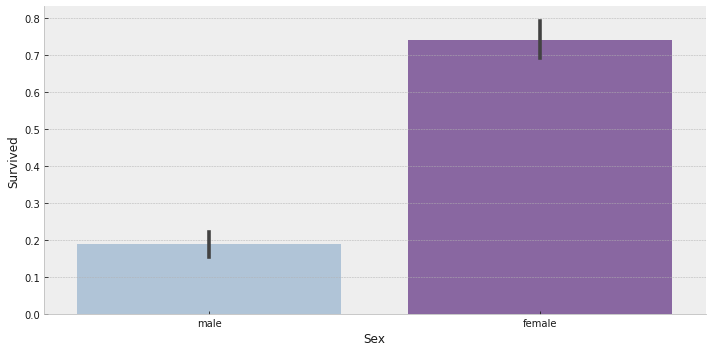

In [467]:
sns.factorplot(x= "Sex", y = "Survived", data = train, size = 5, palette = "BuPu", kind = "bar", aspect = 2)

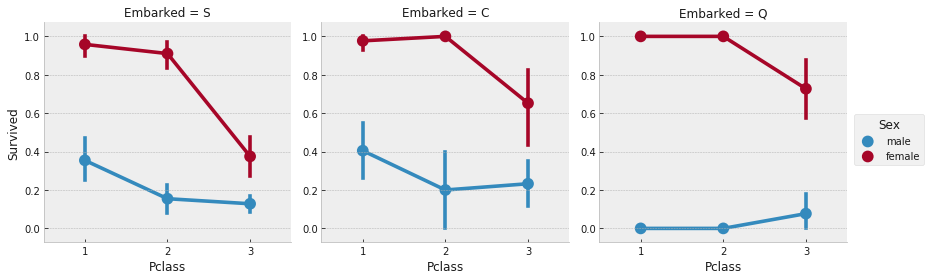

In [468]:
plt.style.use('bmh')
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

### Age vs. Survival

In [469]:
#filling missing values with average age value
train_age = train["Age"]

In [470]:
mean = train["Age"].mean()

In [471]:
train["Age"][train["Age"].isnull()] = mean

In [472]:
for dataset in train_test_data:
    avg = dataset['Age'].mean()
    dataset['Age'][np.isnan(dataset['Age'])] = avg

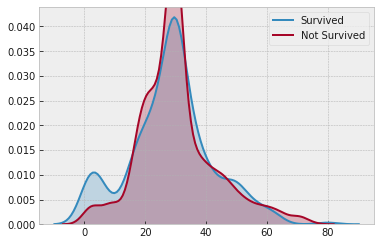

In [473]:
age_survived = train['Age'][train['Survived'] == 1]
age_not_survived = train['Age'][train['Survived'] == 0]

#Plot
plt.style.use('bmh')
sns.kdeplot(age_survived, shade = True, label = "Survived")
sns.kdeplot(age_not_survived, shade = True, label = "Not Survived")

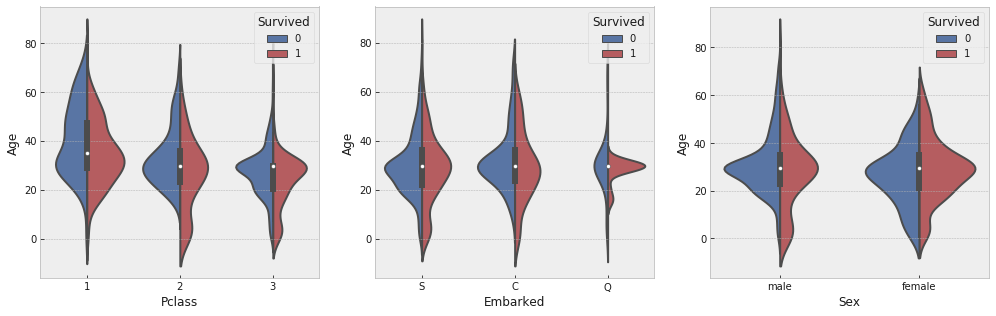

In [474]:
plt.style.use('bmh')
sns.set_color_codes("deep")
fig , (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(17,5))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, palette={0: "b", 1: "r"},split=True, ax=ax1)
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train,palette={0: "b", 1: "r"}, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train,palette={0: "b", 1: "r"}, split=True, ax=ax3)

Observation :

From Pclass violinplot:

1st Pclass has very few children as compared to other two classes.
1st Plcass has more old people as compared to other two classes.
Almost all children (between age 0 to 10) of 2nd Pclass survived.
Most children of 3rd Pclass survived.
Younger people of 1st Pclass survived as compared to its older people.
From Sex violinplot:

Most male children (between age 0 to 14) survived.
Females with age between 18 to 40 have better survival chance.
Old women have better survival chance than old men.

### Embarked vs Survival 

In [475]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [476]:
#Filling missing values in Embark with "S"
train.Embarked.isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [477]:
train['Embarked'][train['Embarked'].isnull()] = 'S'

In [478]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [479]:
train.groupby(['Embarked']).Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

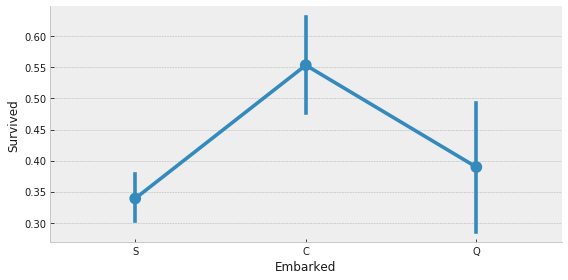

In [480]:
sns.factorplot(x = 'Embarked', y = 'Survived', data = train, size = 4, aspect = 2)

### Observation 
Those who embarked from C had the highest Survival rate. They might be sitting near exit/passway/door 














### Fare vs Survival 

In [481]:
#filling missing data for fare
for dataset in train_test_data:
    avg = dataset['Fare'].mean()
    dataset['Fare'][np.isnan(dataset['Fare'])] = avg

In [482]:
#Compute the Fare for Survived and Not Survived

fare_not_survived = train["Fare"][train["Survived"] == 0]
fare_survived = train["Fare"][train["Survived"] == 1]

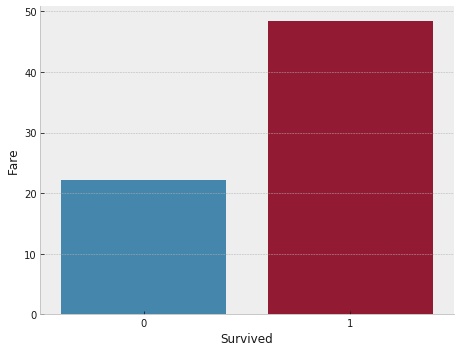

In [483]:
sns.factorplot(x="Survived", y="Fare", data=train,size=5, kind="bar", ci=None, aspect=1.3)

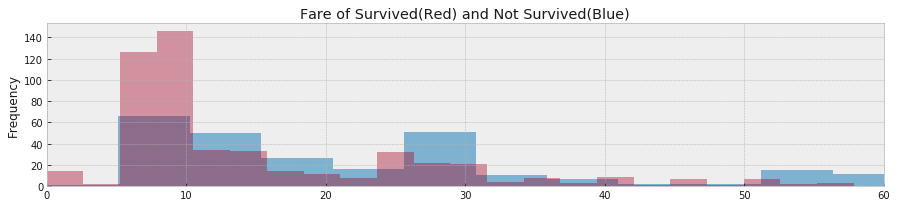

In [484]:
train["Fare"][train["Survived"] == 1].plot(kind='hist', alpha=0.6, figsize=(15,3),bins=100, xlim=(0,60))
train["Fare"][train["Survived"] == 0].plot(kind='hist', alpha=0.4, figsize=(15,3),bins=100, xlim=(0,60), 
                                           title='Fare of Survived(Red) and Not Survived(Blue)')

Observation: There are more number of passengers with cheaper fare but their Survival rate is low.




### Feature Engineering

Basic Rule:

Map all the string values to numerical.
Drop unnecessary features to avoid overfitting & underfitting.

### 1. PassengerId
Index is not required in training dataset but does in testing data(submission purpose).



In [485]:
for data in train_test_data:
    del data['PassengerId']


### 2. Pclass
This feature is considered. This gives the major idea about the Survival of Passenger.

First class passengers have greater chance of survival.
Third class passengers have the least.


In [486]:
pd.crosstab(train['Pclass'], train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### 3. Name


Is there any correlation between the passenger's Title and chance of his/her Survival?

In [487]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')



# Delete the 'Name' columns from datasets
del train['Name']
del test['Name']

### Title

In [320]:
pd.crosstab(train['Title'], train['Pclass'])

Pclass,1,2,3
Title,,,
Capt,1,0,0
Col,2,0,0
Countess,1,0,0
Don,1,0,0
Dr,5,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,3,9,28


In [321]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [322]:
for data in train_test_data:
    data['Title'] = data['Title'].replace(['Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'],'Miss')
    data['Title'] = data['Title'].replace(['Mme', 'Lady'],'Mrs')   
    
train.groupby('Title').Survived.mean()

Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.795276
Others    0.318182
Name: Survived, dtype: float64

In [323]:
for data in train_test_data:
    data['Title'] = data['Title'].map({ 'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, "Others":4 }).astype(int)

In [489]:
#Deleting Title as it is irrelevant to our model
for data in train_test_data:
    del data['Title']

In [324]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,3,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,2,1


### 4. Sex

This is another very important feature.

Females have greater chance of survival

In [496]:
def person(per):
    age,sex = per
    return 'child' if age < 16 else sex

train['Person'] = train[['Age', 'Sex']].apply(person, axis=1)
test['Person'] = test[['Age', 'Sex']].apply(person, axis=1)



In [497]:
# As 'Sex' column is not required.
for data in train_test_data:
    del data['Sex']

In [500]:
for data in train_test_data:
    data['Person'] = data['Person'].map({ 'female':0, 'male':1, 'child':3 }).astype(int)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,0,3,35.0,0,0,373450,8.0500,NaN,S,1


In [498]:
train['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [327]:
train.groupby('Person').Survived.mean()

Person
0    0.756458
1    0.163873
3    0.590361
Name: Survived, dtype: float64

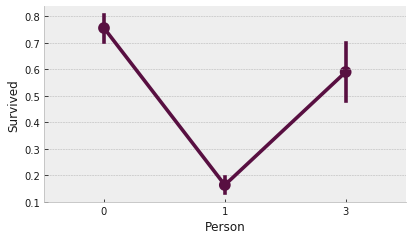

In [328]:
g = sns.PairGrid(train, y_vars="Survived",x_vars="Person",size=3.5, aspect=1.7)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])

In [ ]:
for data in train_test_data :
    data['Person'] = data['Person'].map({'female':0, 'male':1, 'child':3}).astype(int)

In [336]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,3,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,2,1


In [339]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
Person         891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


### Embarked

In [340]:
for data in train_test_data:
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

### Age

In [341]:
# Assign number to Age limits
for data in train_test_data:
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4  

### Cabin & Ticket

In [342]:
#Dropping cabin and tickets
for data in train_test_data:
    del data['Ticket']
    del data['Cabin']

In [343]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,1,0,3,1.0,1,0,7.2500,0,2,1
1,2,1,1,2.0,1,0,71.2833,1,3,0
2,3,1,3,1.0,0,0,7.9250,0,1,0
3,4,1,1,2.0,1,0,53.1000,0,3,0
4,5,0,3,2.0,0,0,8.0500,0,2,1


### Fare

In [353]:
f = pd.qcut(train['Fare'], 4)
print (train.groupby(f).Survived.mean())

Fare
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64


In [354]:
for data in train_test_data:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

### 8. Parch & SibSp
Consider Parents Children(Parch) & Sibling Spouse (SibSp) as Family. Adding this will give Family.

In [355]:
for data in train_test_data:
    data['Family'] = data['Parch'] + data['SibSp']
    data['Family'].loc[data['Family'] > 0] = 1
    data['Family'].loc[data['Family'] == 0] = 0

for data in train_test_data:
    del data['Parch']
    del data['SibSp']

In [392]:
train.head()

,Survived,Pclass,Age,Fare,Embarked,Person,Family
0,0,3,1.0,0,0,1,1
1,1,1,2.0,3,1,0,1
2,1,3,1.0,1,0,0,0
3,1,1,2.0,3,0,0,1
4,0,3,2.0,1,0,1,0


# Machine Learning 

In [411]:
# Importing modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Splitting Training - Test data

In [394]:
X = train.drop('Survived', axis = 1)
y = train.Survived

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [396]:
X_train.shape

(712, 6)

In [397]:
X_test.shape

(179, 6)

In [398]:
y_train.shape

(712,)

In [399]:
y_test.shape

(179,)

## Classification Algorithms




### 1. Logistic Regression

In [400]:
logReg = LogisticRegression()

In [404]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [405]:
y_pred = logReg.predict(X_test)

In [407]:
(logReg.score(X_test, y_test)*100)

73.743016759776538

In [408]:
accuracy_score(y_test, y_pred)

0.73743016759776536

In [409]:
print ('Score: %.2f%%' % (round(logReg.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))

Score: 73.74%
Accuracy: 0.74


## 2. Guassian Naive Bayes

In [412]:
naive_clf = GaussianNB()
naive_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [413]:
y_pred = naive_clf.predict(X_test)

In [417]:
naive_clf.score(X_test, y_test)

0.72625698324022347

In [418]:
accuracy_score(y_test, y_pred)

0.72625698324022347

In [421]:
print('Score: %.2f%%' % (round(naive_clf.score(X_test, y_test)*100,4)))

Score: 72.63%


In [424]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred)))

Accuracy: 0.73%


### 3. Random Forest


In [425]:
rtree_clf = RandomForestClassifier(n_estimators=100)
rtree_clf.fit(X_train, y_train)
y_pred = rtree_clf.predict(X_test)
print ('Score: %.2f%%' % (round(rtree_clf.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))


Score: 80.45%
Accuracy: 0.80


### 5. SVM

In [426]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
print ('Score: %.2f%%' % (round(svc_clf.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))

Score: 80.45%
Accuracy: 0.80


### 6. Linear SVM

In [427]:
linear_clf = LinearSVC()
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
print ('Score: %.2f%%' % (round(linear_clf.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))

Score: 75.42%
Accuracy: 0.75


### 7. KNN

In [428]:
k_range = list(range(1,30))

In [431]:
k_values = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    k_values.append(acc)
    print(k, acc)
    

1 0.810055865922
2 0.787709497207
3 0.804469273743
4 0.793296089385
5 0.804469273743
6 0.804469273743
7 0.821229050279
8 0.793296089385
9 0.787709497207
10 0.810055865922
11 0.782122905028
12 0.793296089385
13 0.787709497207
14 0.804469273743
15 0.798882681564
16 0.810055865922
17 0.798882681564
18 0.815642458101
19 0.798882681564
20 0.804469273743
21 0.793296089385
22 0.782122905028
23 0.793296089385
24 0.804469273743
25 0.798882681564
26 0.782122905028
27 0.804469273743
28 0.787709497207
29 0.776536312849


Text(0,0.5,'Accuracy')

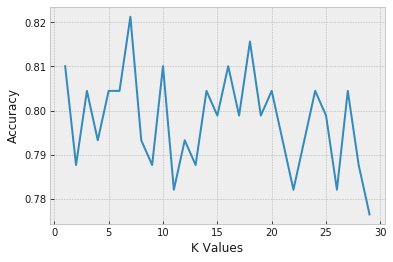

In [432]:
plt.plot(k_range, k_values)
plt.xlabel('K Values')
plt.ylabel('Accuracy')

In [439]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ('Score: %.2f%%' % (round(knn.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))

Score: 82.12%
Accuracy: 0.82


### 8. AdaBoost

1 0.754189944134
2 0.754189944134
3 0.776536312849
4 0.787709497207
5 0.77094972067
6 0.787709497207
7 0.787709497207
8 0.787709497207
9 0.787709497207
10 0.787709497207
11 0.793296089385
12 0.793296089385
13 0.787709497207
14 0.787709497207
15 0.793296089385
16 0.798882681564
17 0.798882681564
18 0.798882681564
19 0.793296089385
20 0.804469273743
21 0.804469273743
22 0.804469273743
23 0.804469273743
24 0.798882681564


Text(0,0.5,'Accuracy')

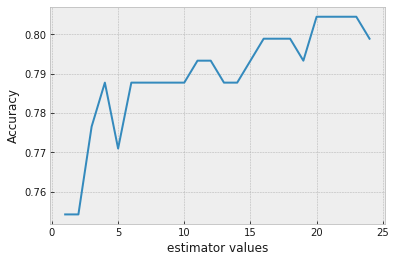

In [440]:
e_range = list(range(1, 25))
estimator_values = []
for est in e_range:
    ada = AdaBoostClassifier(n_estimators=est)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    estimator_values.append(acc)
    print (est,acc)

plt.plot(e_range, estimator_values)
plt.xlabel('estimator values')
plt.ylabel('Accuracy')

In [441]:
ada = AdaBoostClassifier(n_estimators=7)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print ('Score: %.2f%%' % (round(ada.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))


Score: 78.77%
Accuracy: 0.79


### 9. Perceptron

1 0.586592178771
2 0.737430167598
3 0.720670391061
4 0.731843575419
5 0.45251396648
6 0.642458100559
7 0.692737430168
8 0.586592178771
9 0.765363128492
10 0.754189944134
11 0.709497206704
12 0.759776536313
13 0.458100558659
14 0.620111731844
15 0.687150837989
16 0.569832402235
17 0.703910614525
18 0.519553072626
19 0.72625698324
20 0.709497206704
21 0.77094972067
22 0.709497206704
23 0.391061452514
24 0.424581005587
25 0.754189944134
26 0.45251396648
27 0.703910614525
28 0.659217877095
29 0.446927374302


Text(0,0.5,'Accuracy')

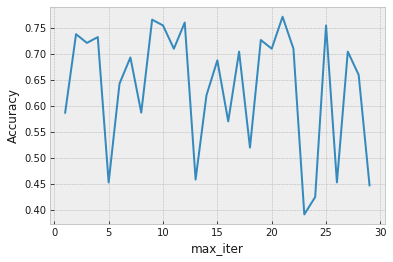

In [442]:
iteration_values = []
for i in range(1,30):
    clf = Perceptron(max_iter=i, tol=None)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    iteration_values.append(acc)
    print (i,acc)

# Plot
plt.plot(range(1,30), iteration_values)
plt.xlabel('max_iter')
plt.ylabel('Accuracy')

In [443]:
per_clf = Perceptron(max_iter=4, tol=None)
per_clf.fit(X_train, y_train)
y_pred = per_clf.predict(X_test)
print ('Score: %.2f%%' % (round(per_clf.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))

Score: 73.18%
Accuracy: 0.73


### 10. Stocastic Gradient Descent (SGD)

In [444]:
sgd_clf = SGDClassifier(max_iter=8, tol=None)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
print ('Score: %.2f%%' % (round(sgd_clf.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))


Score: 44.69%
Accuracy: 0.45


### 11. Bagging

1 0.782122905028
2 0.804469273743
3 0.798882681564
4 0.793296089385
5 0.815642458101
6 0.804469273743
7 0.810055865922
8 0.810055865922
9 0.815642458101
10 0.821229050279
11 0.815642458101
12 0.804469273743
13 0.810055865922
14 0.804469273743
15 0.815642458101
16 0.810055865922
17 0.804469273743
18 0.810055865922
19 0.815642458101
20 0.804469273743
21 0.810055865922
22 0.815642458101
23 0.798882681564
24 0.804469273743
25 0.804469273743
26 0.810055865922
27 0.804469273743
28 0.815642458101
29 0.804469273743


Text(0,0.5,'Accuracy')

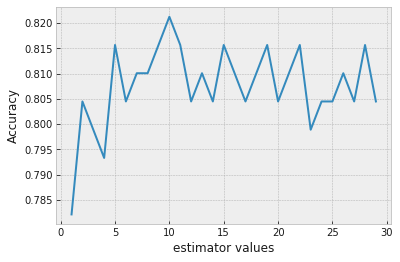

In [445]:
e_range = list(range(1, 30))
estimator_values = []
for est in e_range:
    ada = BaggingClassifier(n_estimators=est)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    estimator_values.append(acc)
    print (est,acc)

plt.plot(e_range, estimator_values)
plt.xlabel('estimator values')
plt.ylabel('Accuracy')

In [446]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print ('Score: %.2f%%' % (round(bag.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))


Score: 81.01%
Accuracy: 0.81
